# AUTO ENCODERS

## What are autoencoders?

Autoencoders are Neural Network algorithms which are used for unsupervised learning. They are made up of 2 different components – an <b>Encoder</b> and a <b>Decoder</b>.
* Encoder – This component takes inputs (Eg. A set of images). It performs a set of mathematical operations of those inputs and tranform it into a compressed representation (This compressed representation is called a Code) . Using those set of operation, the autoencoder will automatically try to learn the important features present in the training images.

* Decoder – This component will take the code generated by the encoder and it will reconstruct the original input from it by performing a different set of mathematical operations. The compressed representation (code) is then converted into a format which is a lossy representation of the original input. 


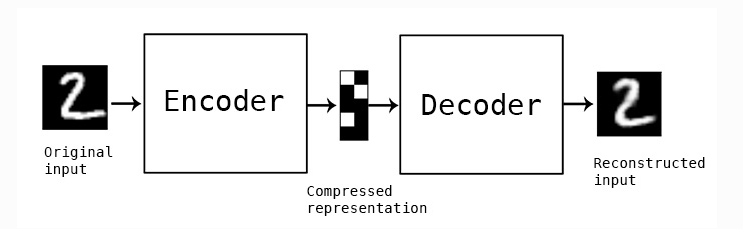

Simple Representation of an Autoencoder (Source - https://blog.keras.io/building-autoencoders-in-keras.html)
<br>
<br>
## What are they used for?

Some of the use cases of auto encoders are:-

1) Anomaly detection – They can learn the normal representation of data during the model training process. The reconstructed output can be compared with the original input to find anomalies or outliers that deviate from the learned patterns. They can be used in financial markets for detecting unusual activties.

2) Image denoising – Autoencoders can be trained to clean up noisy pictures and reconstruct a de-noised respresentation of the input images.

# AUTO ENCODERS FOR DETECTING XRAY IMAGES

We'll see how autoencoders can trained to predict X-Ray images. The encoder will take the input images and perform mathematical operations on those images and learn important features from the images. After this the decoder will use the encoded imformation to form a lossy reconstruction of the image.


## Importing Libraries

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.layers import Dense, Conv2D, MaxPooling2D,MaxPool2D ,UpSampling2D, Flatten, Input

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

## Load the Dataset


In [3]:
#Loading the dataset

#image size
img_size=100

#data paths
trainDatasetPath = "/content/drive/MyDrive/chest_xray/train/"
testDatasetPath = "/content/drive/MyDrive/chest_xray/test/"
valDatasetPath = "/content/drive/MyDrive/chest_xray/val/"

## Preparing the Training, Testing and Validation Data

* Images are read from the given path in a greyscale format and the image  array values are divided by 255 to bring it between 0 and 1.
* The input images are resized to 100x100 pixels

Training Data

In [4]:
training_data=[]
def create_training_data():
      for img in os.listdir(trainDatasetPath):
          try:
            img_array=cv2.imread(os.path.join(trainDatasetPath,img),cv2.IMREAD_GRAYSCALE)
            img_array = img_array/255
            new_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append(new_array)
          except Exception as e:
            print('Error occured ',e)

      print('Training data created. Total images: ',len(training_data))

In [5]:
create_training_data()

Training data created. Total images:  1338


Testing Data

In [6]:
testing_data=[]
def create_testing_data():
      for img in os.listdir(testDatasetPath):
          try:
            img_array=cv2.imread(os.path.join(testDatasetPath,img),cv2.IMREAD_GRAYSCALE)
            img_array = img_array/255
            new_array=cv2.resize(img_array,(img_size,img_size))
            testing_data.append(new_array)
          except Exception as e:
            print('Error occured ',e)

      print('Testing data created. Total images: ',len(testing_data))

In [7]:
create_testing_data()

Testing data created. Total images:  234


Validation Data

In [8]:
validation_data=[]
def create_validation_data():
      for img in os.listdir(valDatasetPath):
          try:
            img_array=cv2.imread(os.path.join(valDatasetPath,img),cv2.IMREAD_GRAYSCALE)
            img_array = img_array/255
            new_array=cv2.resize(img_array,(img_size,img_size))
            validation_data.append(new_array)
          except Exception as e:
            print('Error occured ',e)

      print('Validation data created. Total images: ',len(validation_data))

In [9]:
create_validation_data()

Validation data created. Total images:  8


Prepare the Data - Converting to numpy array and reshaping


In [10]:
#Converting to numpy array
X_train = np.array(training_data)
X_test = np.array(testing_data)
X_val = np.array(validation_data)

#Reshaping
X_train = X_train.reshape(len(X_train), X_train.shape[1],X_train.shape[1] ,1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],X_test.shape[1],1)
X_val = X_val.reshape(len(X_val), X_val.shape[1],X_val.shape[1],1)

## Visualize the Data

In [11]:
#This function will take the name of the dataset and the image index as input and display the image
def visualize(dataset,index):
  new_array=cv2.resize(dataset[index],(img_size,img_size))
  plt.imshow(new_array,cmap='gray')
  plt.show()

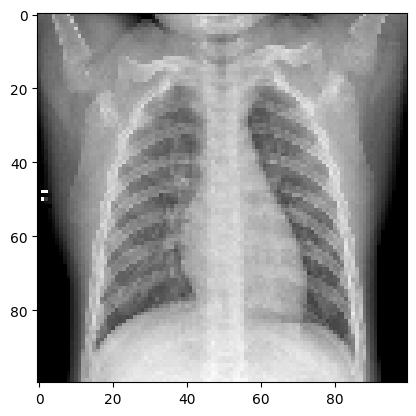

In [12]:
visualize(training_data,3)

## Creating the Autoencoder Architecture

### Encoder:
*  Layer 1: 2D Convolution layer with filter size 3x3 and ReLU activation function
*  Layer 2: 2D Max Pooling layer with filter size 2x2
*  Layer 3: 2D Convolution layer with filter size 3x3 and ReLU activation function
*  Layer 4: 2D Max Pooling layer with filter size 2x2

### Decoder:
*  Layer 1: 2D Convolution layer with filter size 3x3 and ReLU activation function
*  Layer 2: 2D Upsampling layer
*  Layer 3: 2D Convolution layer with filter size 3x3 and ReLU activation function
*  Layer 4: 2D Upsampling layer
*  Layer 5: 2D Convolution layer with filter size 3X3 and Sigmoid activation function

In Autoencoder, the encoder and decoder is compiled together using adam optimizer and binary crossentropy as the loss function.



In [13]:
def create_autoencoder():
    
    input_img = Input(shape=(100,100,1), name='image_input')
    
    #Encoder 
    e1 = Conv2D(100, (3,3), activation='relu', padding='same', name='Conv1')(input_img)
    e2 = MaxPooling2D((2,2), padding='same', name='pool1')(e1)
    e3 = Conv2D(100, (3,3), activation='relu', padding='same', name='Conv2')(e2)
    e4 = MaxPooling2D((2,2), padding='same', name='pool2')(e3)
    
    #Decoder
    d1 = Conv2D(100, (3,3), activation='relu', padding='same', name='Conv3')(e4)
    d2 = UpSampling2D((2,2), name='upsample1')(d1)
    d3 = Conv2D(100, (3,3), activation='relu', padding='same', name='Conv4')(d2)
    d4 = UpSampling2D((2,2), name='upsample2')(d3)
    d5 = Conv2D(1, (3,3), activation='sigmoid', padding='same', name='Conv5')(d4)
    
    #Model
    autoencoder = Model(inputs=input_img, outputs=d5)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    autoencoder.summary()

    return autoencoder

In [14]:
autoencoder = create_autoencoder()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 image_input (InputLayer)    [(None, 100, 100, 1)]     0         
                                                                 
 Conv1 (Conv2D)              (None, 100, 100, 100)     1000      
                                                                 
 pool1 (MaxPooling2D)        (None, 50, 50, 100)       0         
                                                                 
 Conv2 (Conv2D)              (None, 50, 50, 100)       90100     
                                                                 
 pool2 (MaxPooling2D)        (None, 25, 25, 100)       0         
                                                                 
 Conv3 (Conv2D)              (None, 25, 25, 100)       90100     
                                                                 
 upsample1 (UpSampling2D)    (None, 50, 50, 100)       0     

## Training the Autoencoder

We'll train the autoencoder using early stopping callback. The Validation Loss (val_loss) will be monitored constantly and if there is no significant improvement in val_loss for 10 steps, the training will stop automatically. This will help us reduce overfitting.

In [16]:
#Using GPU for training.

with tf.device('/device:GPU:0'):
    early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
    ae_model = autoencoder.fit(X_train, X_train, epochs=500, batch_size=10, validation_data=(X_val, X_val), callbacks=[early_stopping])

Epoch 1/500
134/134 [==============================] - 3s 20ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 2/500
134/134 [==============================] - 3s 20ms/step - loss: 0.5484 - val_loss: 0.5208
Epoch 3/500
134/134 [==============================] - 2s 19ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 4/500
134/134 [==============================] - 3s 22ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 5/500
134/134 [==============================] - 3s 21ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 6/500
134/134 [==============================] - 3s 20ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 7/500
134/134 [==============================] - 3s 21ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 8/500
134/134 [==============================] - 3s 19ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 9/500
134/134 [==============================] - 3s 19ms/step - loss: 0.5481 - val_loss: 0.5206
Epoch 10/500
134/134 [==============================] - 3s 19ms/step - loss: 0.548

Since we are used Early Stopping Callback, the training was complete with 49 epochs. We'll use this autoencoder model to make predictions on out test set.

In [17]:
#Making predictions using the trained autoencoder
predicted = autoencoder.predict(X_test)

8/8 [==============================] - 1s 12ms/step


## Plotting the original and reconstructed image

We'll plot and visualize some images from the test data and corresponding reconstructed images.

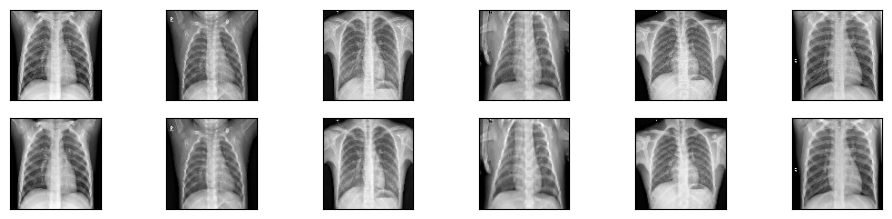

In [24]:
#Plotting 1st six test samples and reconstructed images
plt.figure(figsize=(40, 4))
for i in range(6):
    #Original
    ax = plt.subplot(3, 20, i + 1 + 20)
    plt.imshow(X_test[i].reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #Reconstructed Image
    ax = plt.subplot(3, 20, 2*20 + i + 1)
    plt.imshow(predicted[i].reshape(100, 100))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()